<a href="https://colab.research.google.com/github/UjalaWKarim/Titanic-Dataset/blob/main/WHO_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('WHO-COVID-19-global-table-data.csv')

In [48]:
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (241, 12)


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994048.0,10520.0,NaN,NaN,NaN,7118.0,75.0,NaN,NaN,NaN
1,China,Western Pacific,99381761.0,6755.0,0.0,NaN,0.0,122398.0,8.0,0.0,NaN,0.0
2,French Guiana,NaN,98041.0,32825.0,NaN,NaN,NaN,413.0,138.0,NaN,NaN,NaN
3,Latvia,Europe,977775.0,51255.0,NaN,NaN,NaN,7585.0,398.0,2.0,NaN,2.0
4,Saint Vincent and the Grenadines,Americas,9674.0,8720.0,NaN,NaN,NaN,124.0,112.0,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          241 non-null    object 
 1   WHO Region                                                    222 non-null    object 
 2   Cases - cumulative total                                      241 non-null    float64
 3   Cases - cumulative total per 100000 population                232 non-null    float64
 4   Cases - newly reported in last 7 days                         52 non-null     float64
 5   Cases - newly reported in last 7 days per 100000 population   24 non-null     float64
 6   Cases - newly reported in last 24 hours                       52 non-null     float64
 7   Deaths - cumulative total                                     241 non-n

In [50]:
print("Original Columns:", df.columns.tolist())

df.columns = [col.strip().lower().replace(' ', '_').replace('-', '_') for col in df.columns]
print("Renamed Columns:", df.columns.tolist())

Original Columns: ['Name', 'WHO Region', 'Cases - cumulative total', 'Cases - cumulative total per 100000 population', 'Cases - newly reported in last 7 days', 'Cases - newly reported in last 7 days per 100000 population', 'Cases - newly reported in last 24 hours', 'Deaths - cumulative total', 'Deaths - cumulative total per 100000 population', 'Deaths - newly reported in last 7 days', 'Deaths - newly reported in last 7 days per 100000 population', 'Deaths - newly reported in last 24 hours']
Renamed Columns: ['name', 'who_region', 'cases___cumulative_total', 'cases___cumulative_total_per_100000_population', 'cases___newly_reported_in_last_7_days', 'cases___newly_reported_in_last_7_days_per_100000_population', 'cases___newly_reported_in_last_24_hours', 'deaths___cumulative_total', 'deaths___cumulative_total_per_100000_population', 'deaths___newly_reported_in_last_7_days', 'deaths___newly_reported_in_last_7_days_per_100000_population', 'deaths___newly_reported_in_last_24_hours']


In [51]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows: 0


In [52]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 name                                                              0
who_region                                                       19
cases___cumulative_total                                          0
cases___cumulative_total_per_100000_population                    9
cases___newly_reported_in_last_7_days                           189
cases___newly_reported_in_last_7_days_per_100000_population     217
cases___newly_reported_in_last_24_hours                         189
deaths___cumulative_total                                         0
deaths___cumulative_total_per_100000_population                  16
deaths___newly_reported_in_last_7_days                          215
deaths___newly_reported_in_last_7_days_per_100000_population    241
deaths___newly_reported_in_last_24_hours                        215
dtype: int64


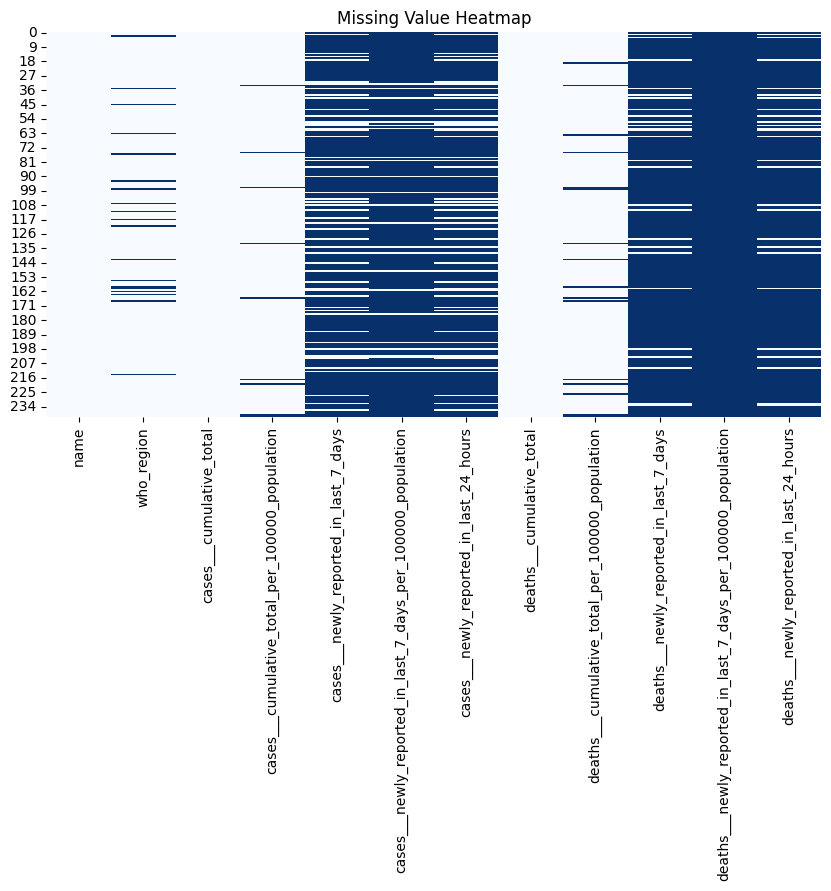

In [53]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title("Missing Value Heatmap")
plt.show()

In [54]:
# Handling missing numeric columns (fill with 0)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Handling categorical missing (fill with mode)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Missing After Cleaning:\n", df.isnull().sum())

Missing After Cleaning:
 name                                                            0
who_region                                                      0
cases___cumulative_total                                        0
cases___cumulative_total_per_100000_population                  0
cases___newly_reported_in_last_7_days                           0
cases___newly_reported_in_last_7_days_per_100000_population     0
cases___newly_reported_in_last_24_hours                         0
deaths___cumulative_total                                       0
deaths___cumulative_total_per_100000_population                 0
deaths___newly_reported_in_last_7_days                          0
deaths___newly_reported_in_last_7_days_per_100000_population    0
deaths___newly_reported_in_last_24_hours                        0
dtype: int64


In [55]:
# Clean 'name' (country names)
if 'name' in df.columns:
    df['name'] = df['name'].str.strip().str.title()

# Clean 'who_region' (region names)
if 'who_region' in df.columns:
    df['who_region'] = df['who_region'].str.strip().str.title()

In [56]:
if 'death' in df.columns and 'recover' in df.columns:
    df['case_outcome'] = np.where(df['death'] == 1, 'Died', np.where(df['recover'] == 1, 'Recovered', 'Active'))

In [57]:
drop_cols = [col for col in ['notes', 'source', 'Unnamed: 0'] if col in df.columns]
df.drop(columns=drop_cols, inplace=True)

In [58]:
df = pd.get_dummies(df, drop_first=True)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [60]:
df.to_csv("covid_data_cleaned_preprocessed.csv", index=False)
print("Final Shape:", df.shape)
df.head()

Final Shape: (241, 256)


,cases___cumulative_total,cases___cumulative_total_per_100000_population,cases___newly_reported_in_last_7_days,cases___newly_reported_in_last_7_days_per_100000_population,cases___newly_reported_in_last_24_hours,deaths___cumulative_total,deaths___cumulative_total_per_100000_population,deaths___newly_reported_in_last_7_days,deaths___newly_reported_in_last_7_days_per_100000_population,deaths___newly_reported_in_last_24_hours,...,name_Wallis And Futuna,name_Yemen,name_Zambia,name_Zimbabwe,who_region_Americas,who_region_Eastern Mediterranean,who_region_Europe,who_region_Other,who_region_South-East Asia,who_region_Western Pacific
0,-0.106973,-0.095288,-0.123454,-0.12415,-0.123454,-0.110933,-0.089676,-0.095648,0.0,-0.095648,...,False,False,False,False,False,False,True,False,False,False
1,1.820714,-0.107478,-0.123454,-0.12415,-0.123454,0.136198,-0.125099,-0.095648,0.0,-0.095648,...,False,False,False,False,False,False,False,False,False,True
2,-0.124528,-0.023074,-0.123454,-0.12415,-0.123454,-0.125306,-0.056367,-0.095648,0.0,-0.095648,...,False,False,False,False,False,False,True,False,False,False
3,-0.107292,0.036594,-0.123454,-0.12415,-0.123454,-0.109932,0.081096,-0.033179,0.0,-0.033179,...,False,False,False,False,False,False,True,False,False,False
4,-0.126260,-0.101116,-0.123454,-0.12415,-0.123454,-0.125926,-0.070114,-0.095648,0.0,-0.095648,...,False,False,False,False,True,False,False,False,False,False
